# Hypotheses Testen

(target-hypothesis-testing)=
_**Hypothesis testing**_ is een fundamentele statistische methode om te bepalen of waargenomen data consistent is met een bepaalde kansverdeling. Het biedt een formeel kader om beslissingen te nemen onder onzekerheid en is van cruciaal belang in machine learning voor model evaluatie en validatie.  

## ML Toepassingen
### Model vergelijking  
Wanneer we twee of meer modellen trainen, willen we weten of het ene model _significant_ (of betekenisvol) beter presteert dan het andere, of dat waargenomen verschillen louter het gevolg zijn van toeval in de data. Bijvoorbeeld: is model A met een accuraatheid van 87% werkelijk beter dan model B met 85%, of zou dit verschil verdwijnen bij een andere random train/test split?  
  
Modelvergelijking is niet alleen van toepassing tijdens de training, maar ook bij:
- Featureselectie: Bij het bepalen welke features relevant zijn, testen we of een feature een significante invloed heeft op de voorspelling. Dit helpt bij het vermijden van {ref}`overfitting <target-over-fitting>` door irrelevante features te verwijderen.
- A/B Testing: In productie-omgevingen testen we of een nieuwe versie van een model beter presteert dan de bestaande versie. Hypothesis testing vertelt ons wanneer we voldoende bewijs hebben om over te schakelen.
- _{ref}`Hyperparameter <target-hyper-parameters>` tuning_: Bij het vergelijken van verschillende hyperparameter configuraties helpt hypothesis testing om te bepalen of waargenomen prestatieverschillen statistisch significant zijn.

### Dataset vergelijking
(target-drift)=
We kunnen testen of trainings- en testdata uit dezelfde distributie komen, of dat er bij incrementele data verschuivingen zijn opgetreden - zogenaamde **data drift** (wat leidt tot gedegradeerde modelprestaties of **model drift**).

## Basisconcept

Bij hypothesis testing vergelijken we twee veronderstellingen of _hypotheses_:
(target-hypothesis)=
- **Nulhypothese** ($H_0$): De standaardaanname, meestal de meest conservatieve veronderstelling: de data zijn {u}`consistent` met een veronderstelde kansverdeling.
- **Alternatieve hypothese** ($H_1$ of $H_a$): De hypothese die we willen testen, meestal dat de data zijn {u}`niet-consistent` met een veronderstelde kansverdeling.

Het doel is om te bepalen of de data voldoende bewijs levert om $H_0$ te verwerpen ten gunste van $H_1$.

## p-waarde
(target-p-value)=
De **p-waarde** is de kans om de waargenomen data en extremere waarden te observeren, gegeven dat de nulhypothese waar is. Een lage p-waarde ($< 0.05$) suggereert dat de data onwaarschijnlijk is onder $H_0$, wat leidt tot verwerping van $H_0$.  
  
Veronderstel dat onder de nulhypothese de data een standaard normale verdeling $\mathcal{N}(0, 1)$ volgt. Als we een nieuwe steekproef met gemiddelde $m = 2$ krijgen, dan is de p-waarde $P(m \geq 2 \mid H_0)$ - de kans om een waarde van $2$ of extremer te observeren als $H_0$ waar is.

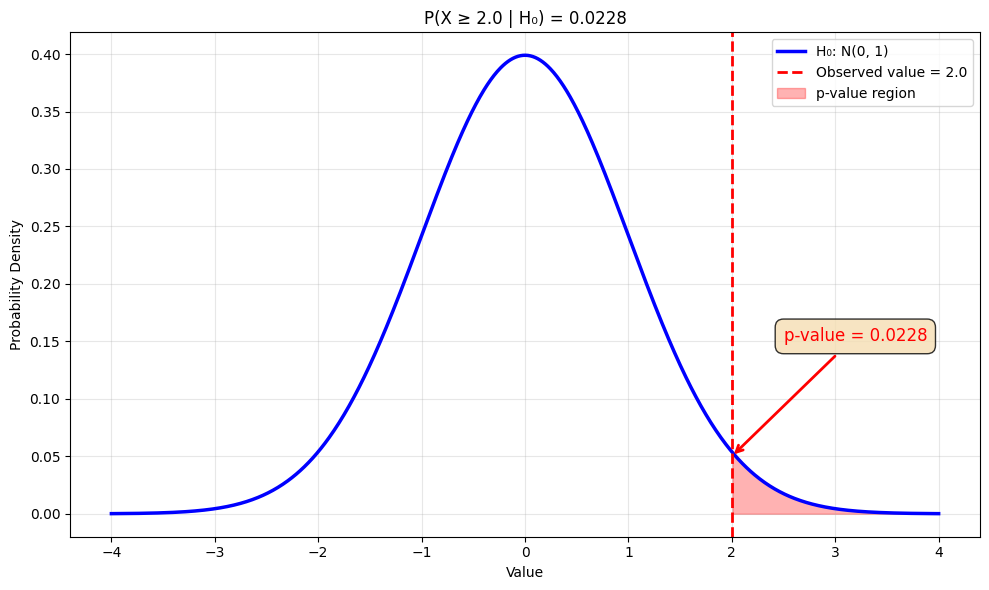

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Illustration of p-value concept
fig, ax = plt.subplots(figsize=(10, 6))

# Parameters for H₀: data follows N(0, 1)
mu_0 = 0
sigma = 1
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu_0, sigma)

# Observed value
observed_value = 2.0

# Plot the distribution under H₀
ax.plot(x, y, "b-", linewidth=2.5, label="H₀: N(0, 1)")
ax.axvline(
    observed_value,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Observed value = {observed_value}",
)

# Shade the p-value region (values ≥ observed)
x_extreme = x[x >= observed_value]
ax.fill_between(
    x_extreme,
    stats.norm.pdf(x_extreme, mu_0, sigma),
    alpha=0.3,
    color="red",
    label="p-value region",
)

# Calculate p-value
p_value = 1 - stats.norm.cdf(observed_value, mu_0, sigma)

ax.set_xlabel("Value")
ax.set_ylabel("Probability Density")
ax.set_title(f"P(X ≥ {observed_value} | H₀) = {p_value:.4f}")
ax.legend()
ax.grid(alpha=0.3)

# Add annotation
ax.annotate(
    f"p-value = {p_value:.4f}",
    xy=(observed_value, 0.05),
    xytext=(2.5, 0.15),
    arrowprops={"arrowstyle": "->", "color": "red", "lw": 2},
    fontsize=12,
    color="red",
    bbox={"boxstyle": "round,pad=0.5", "facecolor": "wheat", "alpha": 0.8},
)

plt.tight_layout()
plt.show()


## Significantieniveau
(target-significance)=
Het **significantieniveau** ($\alpha$) is de drempel voor verwerping van $H_0$. Typisch wordt $\alpha = 0.05$ gebruikt, wat betekent dat we een $5\%$ kans op een type I fout accepteren (ten onrechte $H_0$ verwerpen).

## Type I en Type II fouten
(target-error-types)=
Bij hypothesis testing zijn twee soorten fouten mogelijk:

- **Type I fout** ($\alpha$): $H_0$ verwerpen terwijl deze waar is (vals positief)
- **Type II fout** ($\beta$): $H_0$ niet verwerpen terwijl deze vals is (vals negatief)

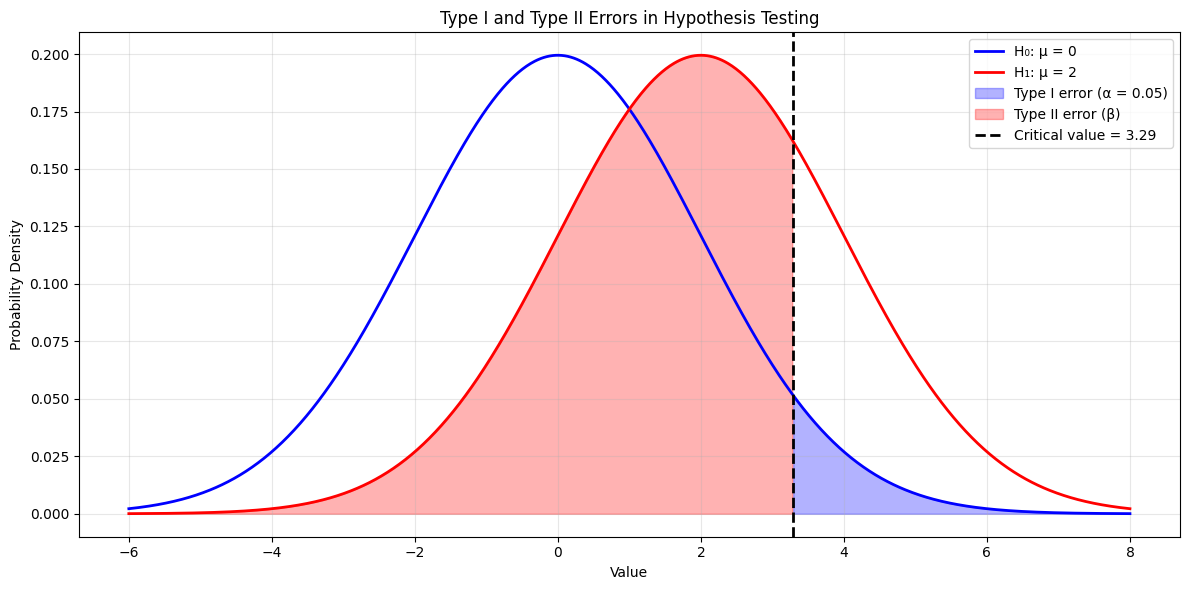

In [2]:
# Visualization of Type I and Type II errors
mu_0 = 0  # H₀ mean
mu_1 = 2  # H₁ mean
sigma = 2
alpha = 0.05

# Critical value for one-tailed test
z_critical = stats.norm.ppf(1 - alpha, mu_0, sigma)

# Generate x values
x = np.linspace(-6, 8, 1000)
y_h0 = stats.norm.pdf(x, mu_0, sigma)
y_h1 = stats.norm.pdf(x, mu_1, sigma)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot distributions
ax.plot(x, y_h0, "b-", linewidth=2, label="H₀: μ = 0")
ax.plot(x, y_h1, "r-", linewidth=2, label="H₁: μ = 2")

# Type I error region (α)
x_alpha = x[x >= z_critical]
ax.fill_between(
    x_alpha,
    stats.norm.pdf(x_alpha, mu_0, sigma),
    alpha=0.3,
    color="blue",
    label=f"Type I error (α = {alpha})",
)

# Type II error region (β)
x_beta = x[x < z_critical]
ax.fill_between(
    x_beta, stats.norm.pdf(x_beta, mu_1, sigma), alpha=0.3, color="red", label="Type II error (β)"
)

# Critical value line
ax.axvline(
    z_critical,
    color="black",
    linestyle="--",
    linewidth=2,
    label=f"Critical value = {z_critical:.2f}",
)

ax.set_xlabel("Value")
ax.set_ylabel("Probability Density")
ax.set_title("Type I and Type II Errors in Hypothesis Testing")
ax.legend(loc="upper right")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Eenzijdige vs. Tweezijdige Tests
(target-test-side)=
Bij hypothesis testing kunnen we kiezen tussen **eenzijdige** en **tweezijdige** tests:

- **Tweezijdige test**: We testen of de parameter _verschilt_ van de hypothetische waarde (kan groter of kleiner zijn). Het significantieniveau $\alpha$ wordt verdeeld over beide staarten van de verdeling ($\alpha/2$ aan elke kant).
  
- **Eenzijdige test**: We testen of de parameter _groter_ of _kleiner_ is dan de hypothetische waarde. Het volledige significantieniveau $\alpha$ wordt aan één kant geplaatst.

Bij een tweezijdige test met $\alpha = 0.05$ gebruiken we kritische waarden van $\pm 1.96$ voor de standaard normale verdeling, waarbij elk uiteinde 2.5% van de verdeling bevat.

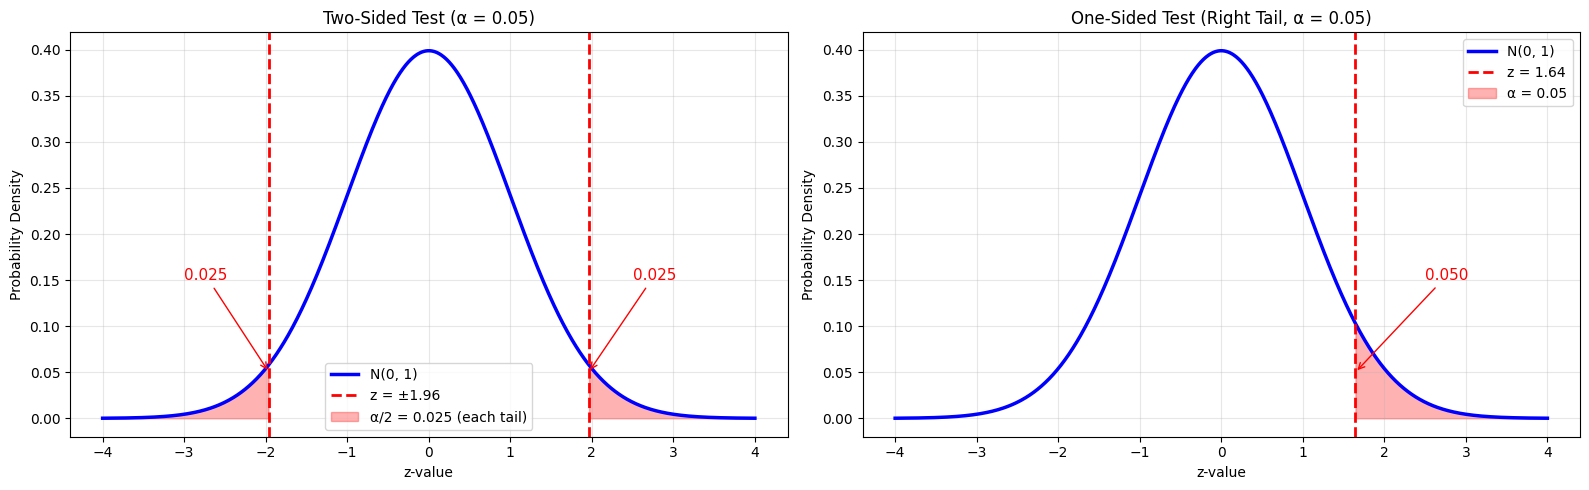

Critical Values:
Two-sided test (α = 0.05): z = ±1.960
One-sided test (α = 0.05): z = 1.645

Note: For a two-sided test, we split α between both tails.
This is why we use ±1.96 for α=0.05 (2.5% in each tail).


In [3]:
# Comparison of one-sided vs two-sided tests
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

mu_0 = 0
sigma = 1
alpha = 0.05
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu_0, sigma)

# Left plot: Two-sided test
z_critical_two_sided = stats.norm.ppf(1 - alpha / 2)  # 1.96 for α=0.05

axes[0].plot(x, y, "b-", linewidth=2.5, label="N(0, 1)")
axes[0].axvline(
    z_critical_two_sided,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"z = ±{z_critical_two_sided:.2f}",
)
axes[0].axvline(-z_critical_two_sided, color="red", linestyle="--", linewidth=2)

# Shade both critical regions
x_left = x[x <= -z_critical_two_sided]
x_right = x[x >= z_critical_two_sided]
axes[0].fill_between(
    x_left,
    stats.norm.pdf(x_left, mu_0, sigma),
    alpha=0.3,
    color="red",
    label=f"α/2 = {alpha / 2} (each tail)",
)
axes[0].fill_between(x_right, stats.norm.pdf(x_right, mu_0, sigma), alpha=0.3, color="red")

axes[0].set_xlabel("z-value")
axes[0].set_ylabel("Probability Density")
axes[0].set_title(f"Two-Sided Test (α = {alpha})")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Add annotations
axes[0].annotate(
    f"{alpha / 2:.3f}",
    xy=(-z_critical_two_sided, 0.05),
    xytext=(-3, 0.15),
    arrowprops={"arrowstyle": "->", "color": "red"},
    fontsize=11,
    color="red",
)
axes[0].annotate(
    f"{alpha / 2:.3f}",
    xy=(z_critical_two_sided, 0.05),
    xytext=(2.5, 0.15),
    arrowprops={"arrowstyle": "->", "color": "red"},
    fontsize=11,
    color="red",
)

# Right plot: One-sided test (right tail)
z_critical_one_sided = stats.norm.ppf(1 - alpha)  # 1.645 for α=0.05

axes[1].plot(x, y, "b-", linewidth=2.5, label="N(0, 1)")
axes[1].axvline(
    z_critical_one_sided,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"z = {z_critical_one_sided:.2f}",
)

# Shade right critical region
x_right_one = x[x >= z_critical_one_sided]
axes[1].fill_between(
    x_right_one,
    stats.norm.pdf(x_right_one, mu_0, sigma),
    alpha=0.3,
    color="red",
    label=f"α = {alpha}",
)

axes[1].set_xlabel("z-value")
axes[1].set_ylabel("Probability Density")
axes[1].set_title(f"One-Sided Test (Right Tail, α = {alpha})")
axes[1].legend()
axes[1].grid(alpha=0.3)

# Add annotation
axes[1].annotate(
    f"{alpha:.3f}",
    xy=(z_critical_one_sided, 0.05),
    xytext=(2.5, 0.15),
    arrowprops={"arrowstyle": "->", "color": "red"},
    fontsize=11,
    color="red",
)

plt.tight_layout()
plt.show()

print("Critical Values:")
print(f"Two-sided test (α = {alpha}): z = ±{z_critical_two_sided:.3f}")
print(f"One-sided test (α = {alpha}): z = {z_critical_one_sided:.3f}")
print("\nNote: For a two-sided test, we split α between both tails.")
print("This is why we use ±1.96 for α=0.05 (2.5% in each tail).")

### Specifieke tests
Er bestaan heel veel verschillende types statistische tests naargelang het soort data en de veronderstelde theoretische of populatieverdelingen.

#### $z$-test
In de {u}`veronderstelling van normaal verdeelde data` kan bijvoorbeeld worden gekeken of het gemiddelde van een steekproef $m$ significant verschilt van een vooropgesteld populatiegemiddelde $\mu$. Theoretisch is het zo dat als we het verschil $m-\mu$ standaardiseren met de **standaardfout van het steekproefgemiddelde**, we een standaard normaalverdeling moeten bekomen.

$$
Z = \frac{m-\mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(0, 1)
$$

(target-standard-error-mean)=
De standaardfout $SE = \sigma/\sqrt{n}$ is de standaardafwijking van de sampling distributie van de gemiddeldes. Ze vertelt ons wat de verwachte spreiding is bij een bepaalde sample grootte over verschillende samples (zie illustratie).  
  
Voor een bepaalde $z$ kunnen we drie versies van de nulhypothese testen, afhankelijk van het feit of we een **eenzijdige** of **tweezijdige** test van het verschil willen uitvoeren:

1. eenzijdige test $H_0: P(Z \geq z) > \alpha$
2. eenzijdige test $H_0: P(Z \leq z) > \alpha$
3. tweezijdige test $H_0: min\{P(Z \geq z), P(Z \leq z)\} > \alpha/2$

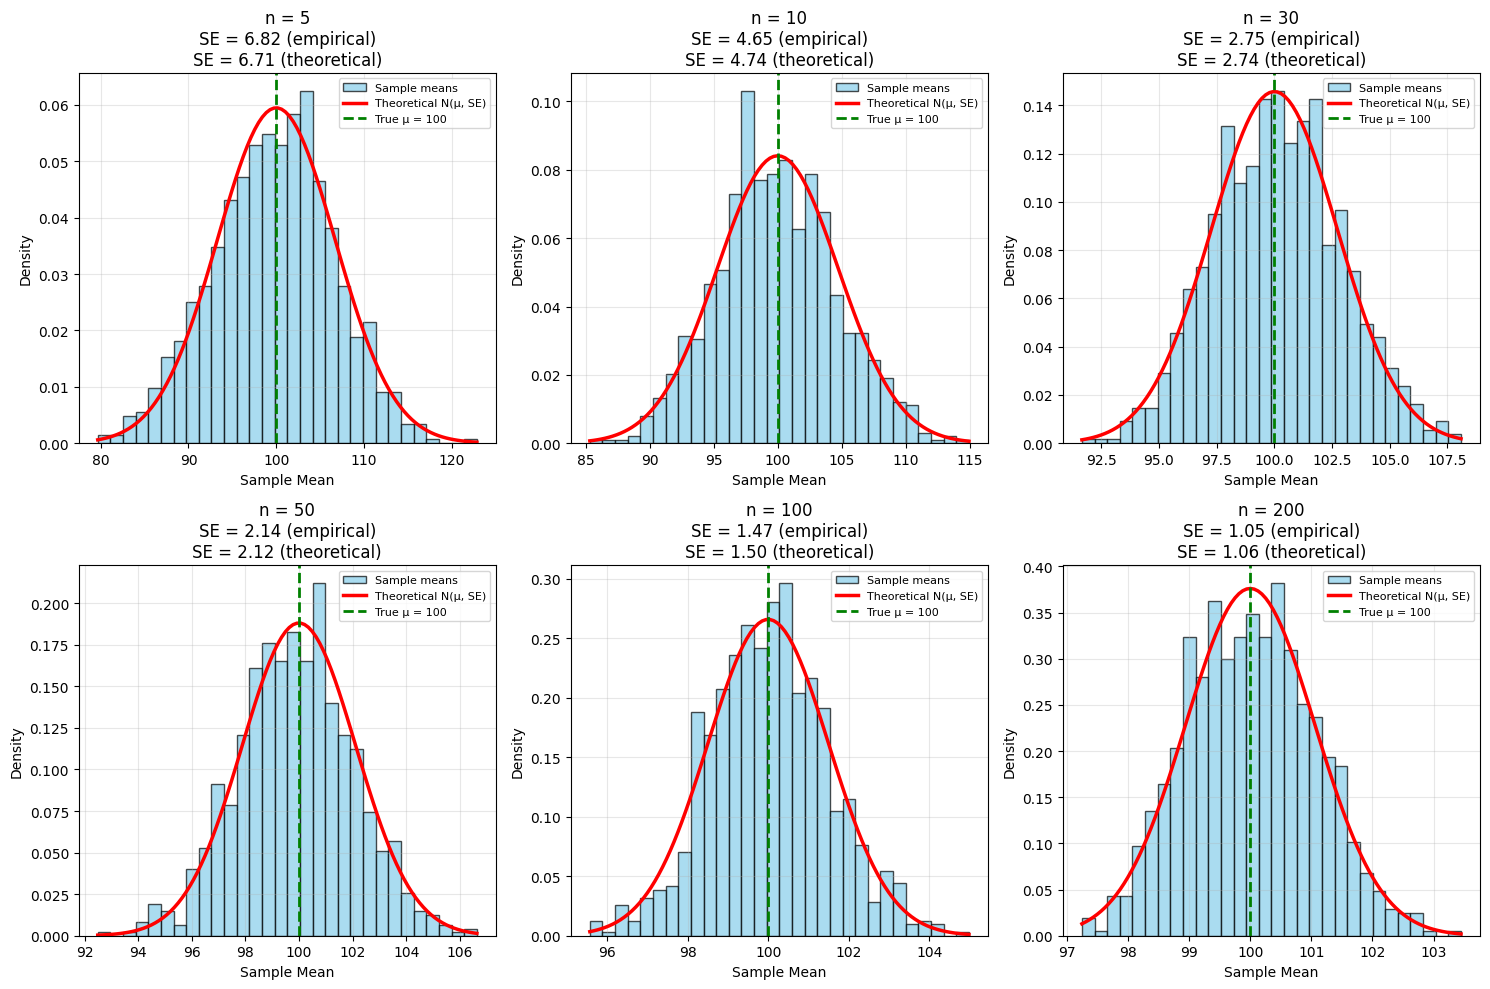

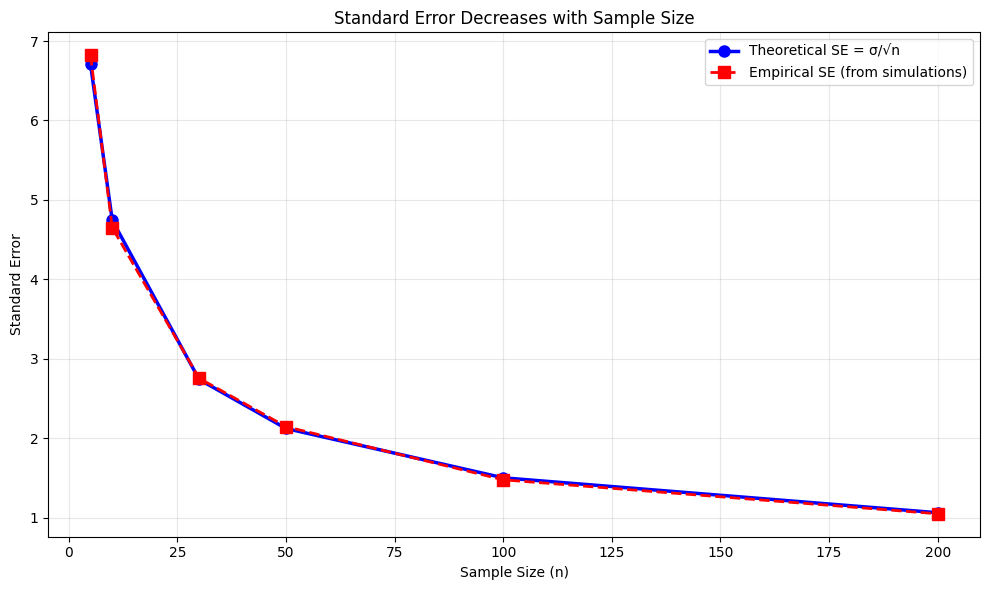

In [4]:
# Illustration of standard error decreasing with sample size
rng = np.random.default_rng(42)
true_mean = 100
true_std = 15
sample_sizes = [5, 10, 30, 50, 100, 200]
n_simulations = 1000

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

theoretical_ses = []
empirical_ses = []

for idx, n in enumerate(sample_sizes):
    # Generate multiple samples and calculate their means
    sample_means = []
    for _ in range(n_simulations):
        sample = rng.normal(true_mean, true_std, n)
        sample_means.append(sample.mean())

    # Calculate empirical standard error (standard deviation of sample means)
    empirical_se = np.std(sample_means, ddof=1)
    empirical_ses.append(empirical_se)

    # Calculate theoretical standard error
    theoretical_se = true_std / np.sqrt(n)
    theoretical_ses.append(theoretical_se)

    # Plot distribution of sample means
    axes[idx].hist(
        sample_means,
        bins=30,
        density=True,
        alpha=0.7,
        color="skyblue",
        edgecolor="black",
        label="Sample means",
    )

    # Overlay theoretical normal distribution
    x = np.linspace(min(sample_means), max(sample_means), 100)
    y = stats.norm.pdf(x, true_mean, theoretical_se)
    axes[idx].plot(x, y, "r-", linewidth=2.5, label="Theoretical N(μ, SE)")

    axes[idx].axvline(
        true_mean, color="green", linestyle="--", linewidth=2, label=f"True μ = {true_mean}"
    )
    axes[idx].set_xlabel("Sample Mean")
    axes[idx].set_ylabel("Density")
    axes[idx].set_title(
        f"n = {n}\nSE = {empirical_se:.2f} (empirical)\nSE = {theoretical_se:.2f} (theoretical)"
    )
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Summary plot: SE vs sample size
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    sample_sizes,
    theoretical_ses,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=8,
    label="Theoretical SE = σ/√n",
)
ax.plot(
    sample_sizes,
    empirical_ses,
    "r--",
    linewidth=2,
    marker="s",
    markersize=8,
    label="Empirical SE (from simulations)",
)
ax.set_xlabel("Sample Size (n)")
ax.set_ylabel("Standard Error")
ax.set_title("Standard Error Decreases with Sample Size")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Student's $t$-test

[![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/William_Sealy_Gosset.jpg/250px-William_Sealy_Gosset.jpg?raw=true)](https://en.wikipedia.org/wiki/William_Sealy_Gosset)

(target-one-sample-t)=
Bij de $z$-test veronderstellen we dat we de standaardfout op het gemiddelde $\sigma/\sqrt{n}$ exact kennen op basis van de populatievariantie $\sigma^2$. Dit is echter in de meeste gevallen niet waar. Er wordt gewerkt met de steekproefvariantie $s^2$ die op zich een schatting is. Vooral bij kleine steekproefgroottes is dit problematisch. Statisticus en chemicus/brouwer William Sealy Gosset (die voor Guinness Breweries werkte en onder het pseudoniem "Student" publiceerde), toonde aan dat bij standaardisatie van verschillen tussen gemiddeldes met de sample $SE=s/\sqrt{n}$, geen standaard normaal verdeling bekomen wordt, maar wel een zogenaamde $t$-distributie met als parameter $n-1$ zogenaamde vrijheidsgraden (_degrees of freedom_; $df$; {cite}`10.2307/2331554`). 

$$
T = \frac{m - \mu}{s/\sqrt{n}} \sim t(n-1)
$$


t-distributies hebben volgende kenmerkende eigenschappen:
1. Zwaardere staarten: De t-distributie heeft dikkere staarten dan de normale verdeling, wat de extra onzekerheid reflecteert
2. Afhankelijk van steekproefgrootte: De vorm wordt bepaald door de vrijheidsgraden ($df = n - 1$)
3. Convergentie: Voor grote $n$ (ongeveer $n > 30$) convergeert de t-distributie naar de normale verdeling

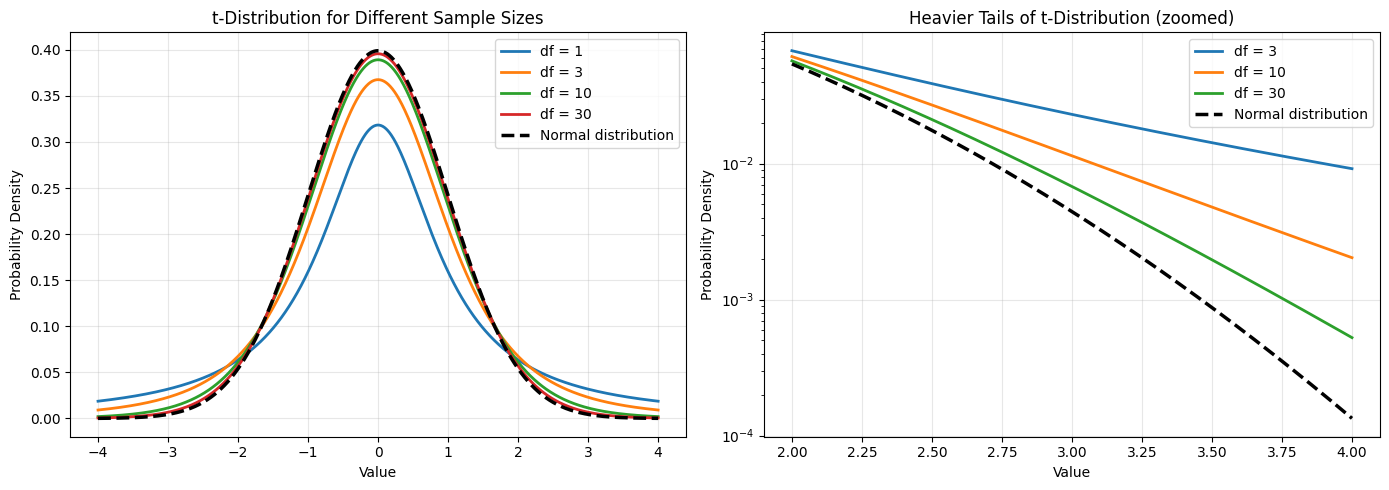

In [5]:
# Comparison of t-distribution with normal distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-4, 4, 1000)

# Left plot: Different degrees of freedom
for df in [1, 3, 10, 30]:
    y = stats.t.pdf(x, df)
    axes[0].plot(x, y, linewidth=2, label=f"df = {df}")

# Add normal distribution for comparison
y_norm = stats.norm.pdf(x)
axes[0].plot(x, y_norm, "k--", linewidth=2.5, label="Normal distribution")

axes[0].set_xlabel("Value")
axes[0].set_ylabel("Probability Density")
axes[0].set_title("t-Distribution for Different Sample Sizes")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Right plot: Zoom on tails to show difference
x_tail = np.linspace(2, 4, 500)
for df in [3, 10, 30]:
    y_tail = stats.t.pdf(x_tail, df)
    axes[1].plot(x_tail, y_tail, linewidth=2, label=f"df = {df}")

y_norm_tail = stats.norm.pdf(x_tail)
axes[1].plot(x_tail, y_norm_tail, "k--", linewidth=2.5, label="Normal distribution")

axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability Density")
axes[1].set_title("Heavier Tails of t-Distribution (zoomed)")
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_yscale("log")

plt.tight_layout()
plt.show()

Hieronder illustreren we een t-test voor een voorbeeld waarbij we in een steekproef de lengte van volwassenen hebben gemeten (in cm) en de hypothese willen testen dat het populatiegemiddelde 170 cm bedraagt ($H_0: min\{P(T \geq t), P(T \leq t)\} > \alpha/2$, met $\alpha = 0.05$)  
  
Dit is een voorbeeld van een zogenaamde **one-sample $t$-test**

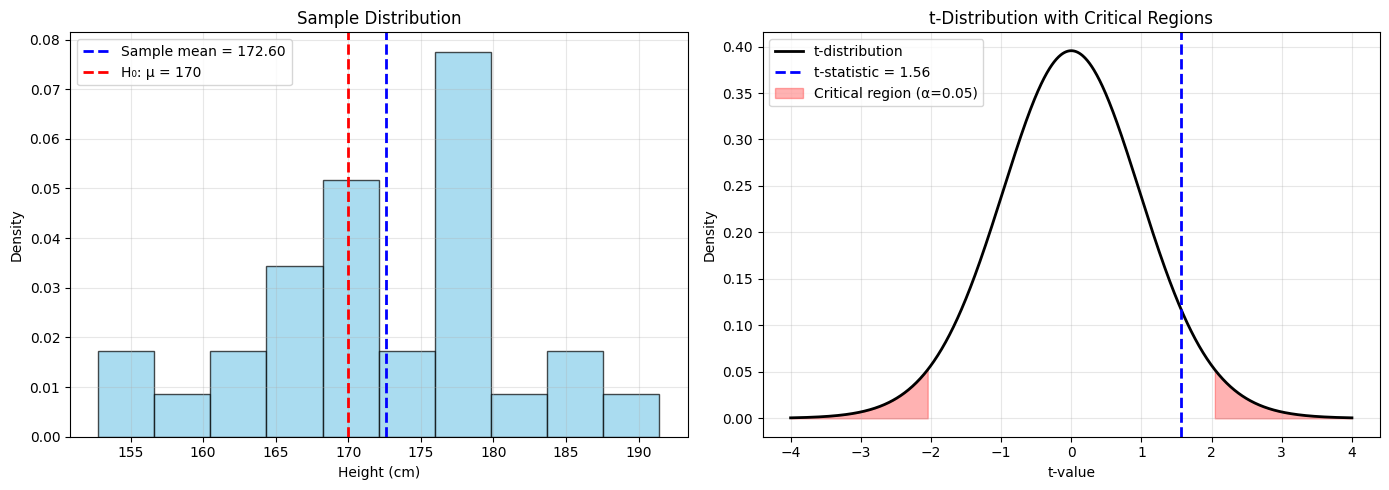

In [6]:
# Generate sample data
true_mean = 172
sample_size = 30
sample = rng.normal(true_mean, 8, sample_size)

# Hypothesis: population mean is 170
hypothesized_mean = 170

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample, hypothesized_mean)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Sample distribution
ax1.hist(sample, bins=10, density=True, alpha=0.7, color="skyblue", edgecolor="black")
ax1.axvline(
    sample.mean(),
    color="blue",
    linestyle="--",
    linewidth=2,
    label=f"Sample mean = {sample.mean():.2f}",
)
ax1.axvline(
    hypothesized_mean,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"H₀: μ = {hypothesized_mean}",
)
ax1.set_xlabel("Height (cm)")
ax1.set_ylabel("Density")
ax1.set_title("Sample Distribution")
ax1.legend()
ax1.grid(alpha=0.3)

# Right plot: t-distribution
df = sample_size - 1
x = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(x, df)
ax2.plot(x, t_dist, "k-", linewidth=2, label="t-distribution")
ax2.axvline(
    t_statistic, color="blue", linestyle="--", linewidth=2, label=f"t-statistic = {t_statistic:.2f}"
)

# Shade critical regions (two-tailed, α=0.05)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)
x_left = x[x < -t_critical]
x_right = x[x > t_critical]
ax2.fill_between(
    x_left, stats.t.pdf(x_left, df), alpha=0.3, color="red", label=f"Critical region (α={alpha})"
)
ax2.fill_between(x_right, stats.t.pdf(x_right, df), alpha=0.3, color="red")

ax2.set_xlabel("t-value")
ax2.set_ylabel("Density")
ax2.set_title("t-Distribution with Critical Regions")
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### _Two-Sample_ $t$-test
(target-two-sample-t)=
De **_two-sample_ $t$-test** vergelijkt de gemiddelden van twee onafhankelijke steekproeven. Er bestaan twee versies afhankelijk van het feit of we gelijke of ongelijke populaties veronderstellen.

##### Gelijke varianties

Als we veronderstellen dat beide steekproeven dezelfde populatievariantie hebben ($\sigma_1^2 = \sigma_2^2$), kunnen we een _gepoolde variantie_ gebruiken:

$$
s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}
$$

$$
T = \frac{m_1 - m_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim t(n_1 + n_2 - 2)
$$

waarbij $m_1$ en $m_2$ de steekproefgemiddeldes zijn, $s_1^2$ en $s_2^2$ de steekproefvarianties, en $n_1$ en $n_2$ de steekproefgroottes. 

##### Ongelijke varianties (Welch's t-test)

Deze versie veronderstelt {u}`niet` dat de twee steekproeven dezelfde variantie hebben:

$$
T = \frac{m_1 - m_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim t(df)
$$

De vrijheidsgraden $df$ worden berekend via de Welch-Satterthwaite vergelijking:

$$
df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}
$$

In de praktijk wordt meestal Welch's t-test gebruikt omdat deze robuuster is en geen assumptie van gelijke varianties vereist.

Hieronder illustreren we Welch's t-test om na te gaan of twee groepen van personen uit verschillende populaties van lengtes komen.

/tmp/ipykernel_964515/903277991.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(


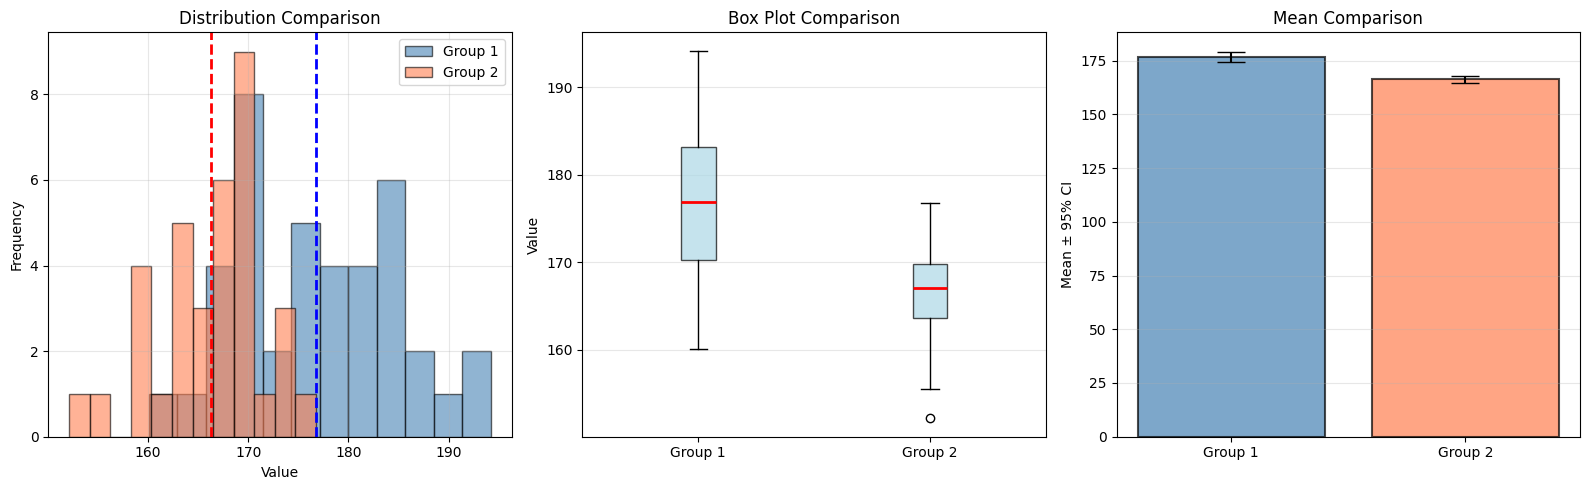

Group 1 mean: 176.76 ± 7.79
Group 2 mean: 166.25 ± 5.20

t-statistic: 6.6798
p-value: 0.0000

Conclusion: Reject H₀ at α=0.05


In [7]:
# Generate two samples
group1 = rng.normal(175, 7, 40)  # e.g., men
group2 = rng.normal(165, 6, 35)  # e.g., women

# Perform two-sample t-test
t_stat, p_val = stats.ttest_ind(group1, group2)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Histograms
axes[0].hist(group1, bins=12, alpha=0.6, color="steelblue", edgecolor="black", label="Group 1")
axes[0].hist(group2, bins=12, alpha=0.6, color="coral", edgecolor="black", label="Group 2")
axes[0].axvline(group1.mean(), color="blue", linestyle="--", linewidth=2)
axes[0].axvline(group2.mean(), color="red", linestyle="--", linewidth=2)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution Comparison")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Box plots
axes[1].boxplot(
    [group1, group2],
    labels=["Group 1", "Group 2"],
    patch_artist=True,
    boxprops={"facecolor": "lightblue", "alpha": 0.7},
    medianprops={"color": "red", "linewidth": 2},
)
axes[1].set_ylabel("Value")
axes[1].set_title("Box Plot Comparison")
axes[1].grid(alpha=0.3, axis="y")

# Plot 3: Mean comparison with confidence intervals
means = [group1.mean(), group2.mean()]
sems = [stats.sem(group1), stats.sem(group2)]
ci = [1.96 * sem for sem in sems]  # 95% confidence interval

x_pos = [0, 1]
axes[2].bar(
    x_pos,
    means,
    yerr=ci,
    capsize=10,
    alpha=0.7,
    color=["steelblue", "coral"],
    edgecolor="black",
    linewidth=1.5,
)
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(["Group 1", "Group 2"])
axes[2].set_ylabel("Mean ± 95% CI")
axes[2].set_title("Mean Comparison")
axes[2].grid(alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print(f"Group 1 mean: {group1.mean():.2f} ± {group1.std():.2f}")
print(f"Group 2 mean: {group2.mean():.2f} ± {group2.std():.2f}")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"\nConclusion: {'Reject H₀' if p_val < 0.05 else 'Fail to reject H₀'} at α=0.05")

#### Binomiaaltest
(target-binomial-test)=
De **binomiaaltest** wordt gebruikt om te testen of de waargenomen proportie in een steekproef overeenkomt met een veronderstelde populatieproportie. Deze test is geschikt voor binaire uitkomsten (succes/falen, ja/nee, etc.).

**Hypothese**: We testen of de proportie successen $p$ gelijk is aan een hypothetische waarde $p_0$:
- $H_0: p = p_0$
- $H_1: p \neq p_0$ (tweezijdig) of $H_1: p > p_0$ of $H_1: p < p_0$ (eenzijdig)

Onder $H_0$ volgt het aantal successen $k$ in $n$ trials een binomiale verdeling:

$$
P(X = k \mid H_0) = \binom{n}{k} p_0^k (1-p_0)^{n-k}
$$

De p-waarde wordt berekend als de kans om $k$ of een extremere waarde te observeren onder $H_0$.

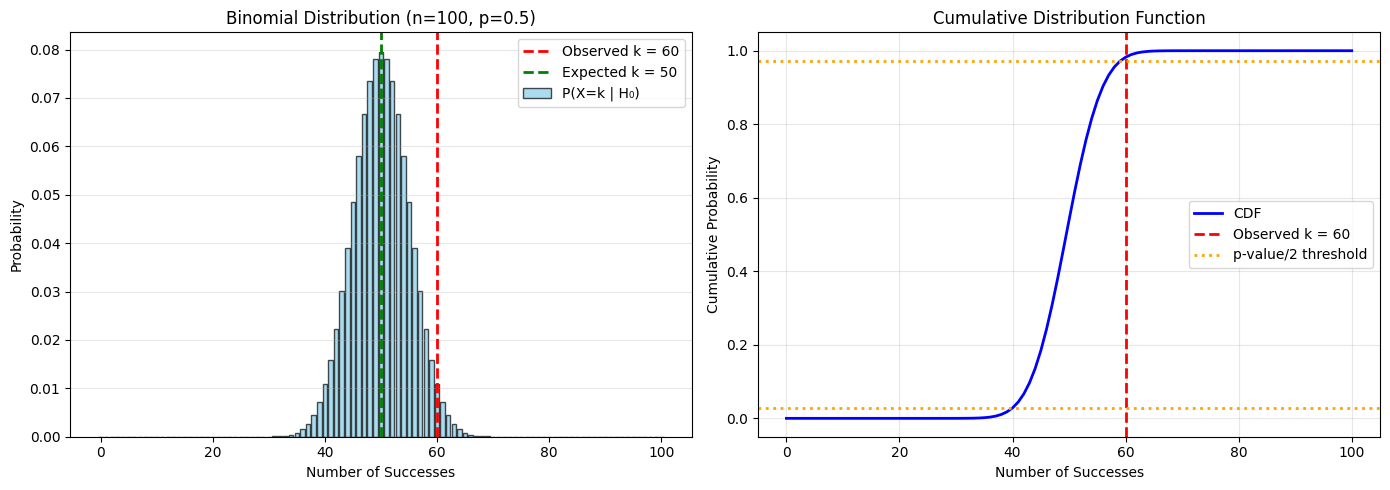

In [8]:
# Binomial test example
from scipy.stats import binomtest

# Example: Testing if a coin is fair
# We flip a coin 100 times and observe 60 heads
n_trials = 100
n_successes = 60
p_null = 0.5  # Fair coin hypothesis

# Perform binomial test (two-sided)
result = binomtest(n_successes, n_trials, p_null, alternative="two-sided")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Binomial distribution under H₀
k = np.arange(0, n_trials + 1)
pmf = stats.binom.pmf(k, n_trials, p_null)

axes[0].bar(k, pmf, alpha=0.7, color="skyblue", edgecolor="black", label="P(X=k | H₀)")
axes[0].axvline(
    n_successes, color="red", linestyle="--", linewidth=2, label=f"Observed k = {n_successes}"
)
axes[0].axvline(
    n_trials * p_null,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Expected k = {n_trials * p_null:.0f}",
)
axes[0].set_xlabel("Number of Successes")
axes[0].set_ylabel("Probability")
axes[0].set_title(f"Binomial Distribution (n={n_trials}, p={p_null})")
axes[0].legend()
axes[0].grid(alpha=0.3, axis="y")

# Plot 2: Cumulative distribution and p-value regions
cdf = stats.binom.cdf(k, n_trials, p_null)
axes[1].plot(k, cdf, "b-", linewidth=2, label="CDF")
axes[1].axvline(
    n_successes, color="red", linestyle="--", linewidth=2, label=f"Observed k = {n_successes}"
)
axes[1].axhline(
    result.pvalue / 2, color="orange", linestyle=":", linewidth=2, label="p-value/2 threshold"
)
axes[1].axhline(1 - result.pvalue / 2, color="orange", linestyle=":", linewidth=2)
axes[1].set_xlabel("Number of Successes")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Cumulative Distribution Function")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()